In [25]:
%pip install numpy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Q2.1/2.2

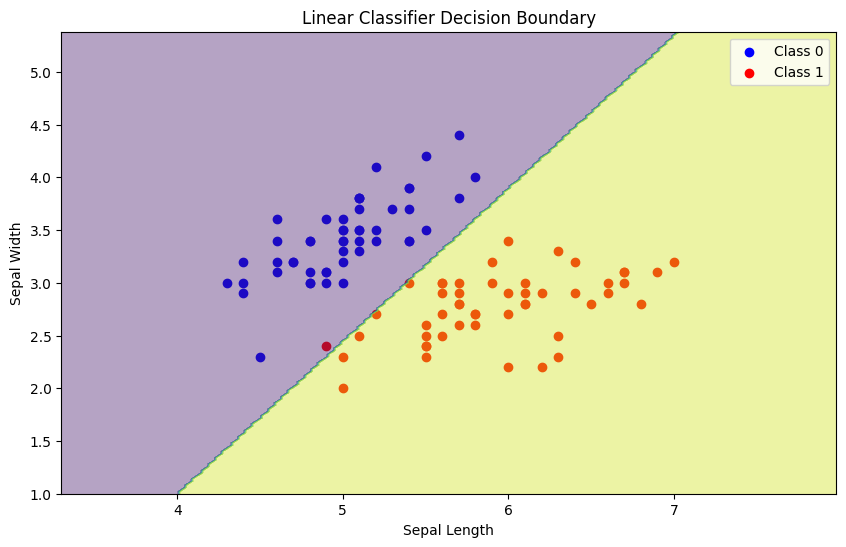

Linear Classifier Train Accuracy: 1.0
Linear Classifier Test Accuracy: 0.9875


In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load iris dataset
iris = load_iris()
X = iris.data[:100, :2]  # First two features, first 100 samples
y = iris.target[:100]    # Binary classification

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')

# Decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Linear Classifier Decision Boundary')
plt.legend()
plt.show()

# Accuracy
train_acc = accuracy_score(y_train, lr.predict(X_train))
test_acc = accuracy_score(y_test, lr.predict(X_test))
print(f"Linear Classifier Train Accuracy: {train_acc}")
print(f"Linear Classifier Test Accuracy: {test_acc}")

# Q2.3/Q2.4/Q2.5/Q2.6

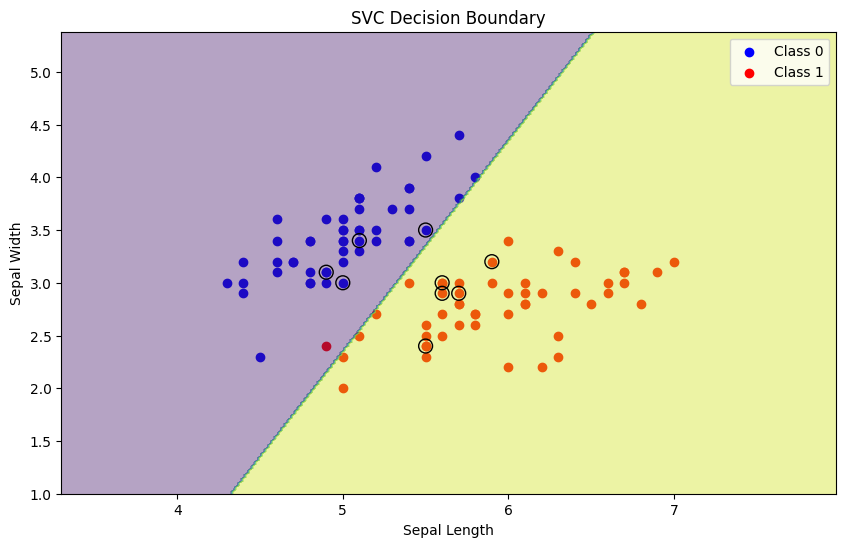

SVC Train Accuracy: 1.0
SVC Test Accuracy: 0.9875
SVC Margin: 0.42479461732040225
Orthogonal Vector (w): [ 2.10588794 -1.05210405]


In [27]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Load iris dataset
iris = load_iris()
X = iris.data[:100, :2]  # First two features, first 100 samples
y = iris.target[:100]    # Binary classification

# Split data (use same split as in previous script)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

# Train SVC
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Plot decision boundary and margins
plt.figure(figsize=(10, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')

# Decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

# Support Vectors
plt.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVC Decision Boundary')
plt.legend()
plt.show()

# Accuracy
train_acc = accuracy_score(y_train, svc.predict(X_train))
test_acc = accuracy_score(y_test, svc.predict(X_test))
print(f"SVC Train Accuracy: {train_acc}")
print(f"SVC Test Accuracy: {test_acc}")

# Margin
margin = 1 / np.linalg.norm(svc.coef_)
print(f"SVC Margin: {margin}")

# Orthogonal vector
print("Orthogonal Vector (w):", svc.coef_[0])

# Q2.7

From the SVC lecture notes:

Linear Classifier (Logistic Regression) and SVC both aim to find a hyperplane that separates classes
However, the optimization objectives are different:

- Logistic Regression minimizes cross-entropy loss
- SVC maximizes the margin between classes

Therefore, the boundaries will be similar but not identical. Different optimization objectives lead to slight variations


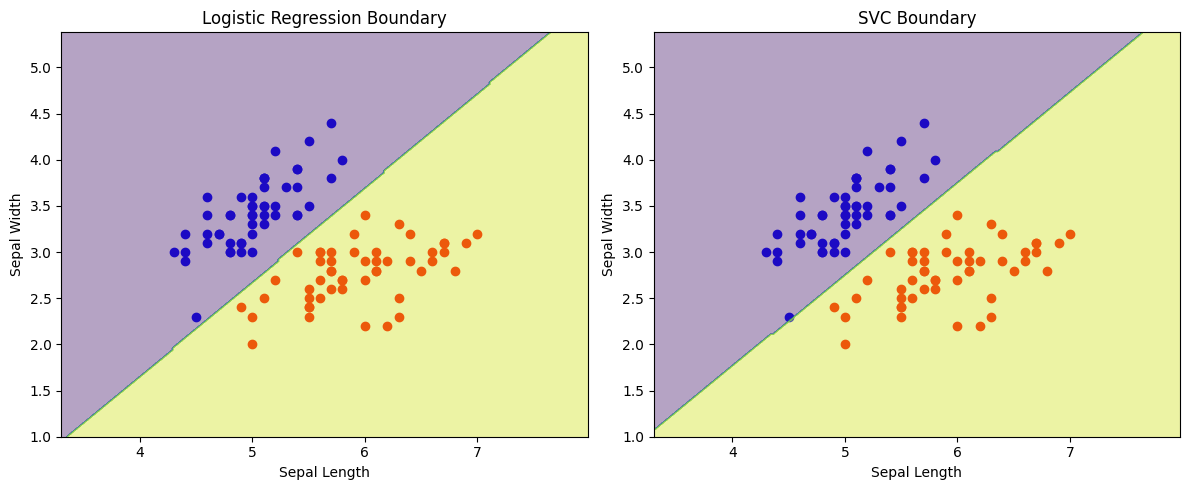

Logistic Regression Coefficients: [[ 3.08267284 -3.01867739]]
SVC Coefficients: [[ 2.22720466 -2.24959915]]


In [28]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Load binary iris dataset
iris = load_iris()
X = iris.data[:100, :2]  # First two features, first 100 samples
y = iris.target[:100]    # Binary classification

# Train Logistic Regression and SVC
lr = LogisticRegression()
svc = SVC(kernel='linear')

lr.fit(X, y)
svc.fit(X, y)

# Plot decision boundaries
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')
plt.title('Logistic Regression Boundary')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Logistic Regression boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z_lr = lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lr = Z_lr.reshape(xx.shape)
plt.contourf(xx, yy, Z_lr, alpha=0.4)

plt.subplot(122)
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')
plt.title('SVC Boundary')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# SVC boundary
Z_svc = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svc = Z_svc.reshape(xx.shape)
plt.contourf(xx, yy, Z_svc, alpha=0.4)

plt.tight_layout()
plt.show()

# Compare decision function coefficients
print("Logistic Regression Coefficients:", lr.coef_)
print("SVC Coefficients:", svc.coef_)

# Q2.8

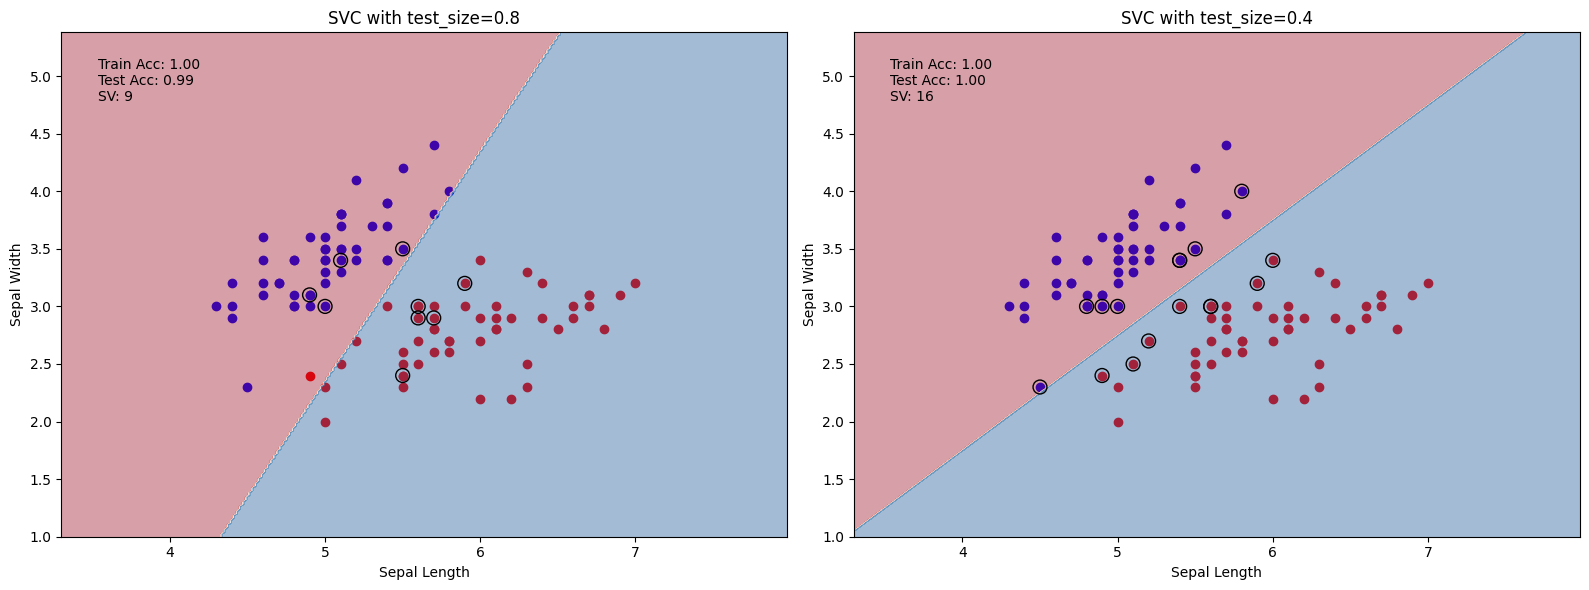

First Split (test_size=0.8):
Train Accuracy: 1.0, Test Accuracy: 0.9875
Number of Support Vectors: 9
Decision Boundary Coefficients: [[ 2.10588794 -1.05210405]]

Second Split (test_size=0.4):
Train Accuracy: 1.0, Test Accuracy: 1.0
Number of Support Vectors: 16
Decision Boundary Coefficients: [[ 2.2222485  -2.22235281]]


In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load iris dataset (binary classification)
iris = load_iris()
X = iris.data[:100, :2]  # First two features, first 100 samples
y = iris.target[:100]    # Binary classification

# Two different train-test splits
plt.figure(figsize=(16, 6))

# First split (test_size=0.8)
plt.subplot(121)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.8, random_state=0)

# Train SVC
svc1 = SVC(kernel='linear')
svc1.fit(X_train1, y_train1)

# Plot data and decision boundary
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')

# Decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))
Z1 = svc1.predict(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
plt.contourf(xx, yy, Z1, alpha=0.4, cmap=plt.cm.RdBu)

# Support vectors
plt.scatter(svc1.support_vectors_[:, 0], svc1.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.title('SVC with test_size=0.8')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Accuracy and support vector information
train_acc1 = accuracy_score(y_train1, svc1.predict(X_train1))
test_acc1 = accuracy_score(y_test1, svc1.predict(X_test1))
plt.text(0.05, 0.95, f'Train Acc: {train_acc1:.2f}\nTest Acc: {test_acc1:.2f}\nSV: {len(svc1.support_vectors_)}', 
         transform=plt.gca().transAxes, verticalalignment='top')

# Second split (test_size=0.4)
plt.subplot(122)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.4, random_state=0)

# Train SVC
svc2 = SVC(kernel='linear')
svc2.fit(X_train2, y_train2)

# Plot data and decision boundary
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='red', label='Class 1')

# Decision boundary
Z2 = svc2.predict(np.c_[xx.ravel(), yy.ravel()])
Z2 = Z2.reshape(xx.shape)
plt.contourf(xx, yy, Z2, alpha=0.4, cmap=plt.cm.RdBu)

# Support vectors
plt.scatter(svc2.support_vectors_[:, 0], svc2.support_vectors_[:, 1], 
            s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.title('SVC with test_size=0.4')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Accuracy and support vector information
train_acc2 = accuracy_score(y_train2, svc2.predict(X_train2))
test_acc2 = accuracy_score(y_test2, svc2.predict(X_test2))
plt.text(0.05, 0.95, f'Train Acc: {train_acc2:.2f}\nTest Acc: {test_acc2:.2f}\nSV: {len(svc2.support_vectors_)}', 
         transform=plt.gca().transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()

# Print detailed information
print("First Split (test_size=0.8):")
print(f"Train Accuracy: {train_acc1}, Test Accuracy: {test_acc1}")
print(f"Number of Support Vectors: {len(svc1.support_vectors_)}")
print(f"Decision Boundary Coefficients: {svc1.coef_}")

print("\nSecond Split (test_size=0.4):")
print(f"Train Accuracy: {train_acc2}, Test Accuracy: {test_acc2}")
print(f"Number of Support Vectors: {len(svc2.support_vectors_)}")
print(f"Decision Boundary Coefficients: {svc2.coef_}")

- Changing train-test split affects support vectors
- Accuracy might slightly change
- Support vectors define the margin of separation

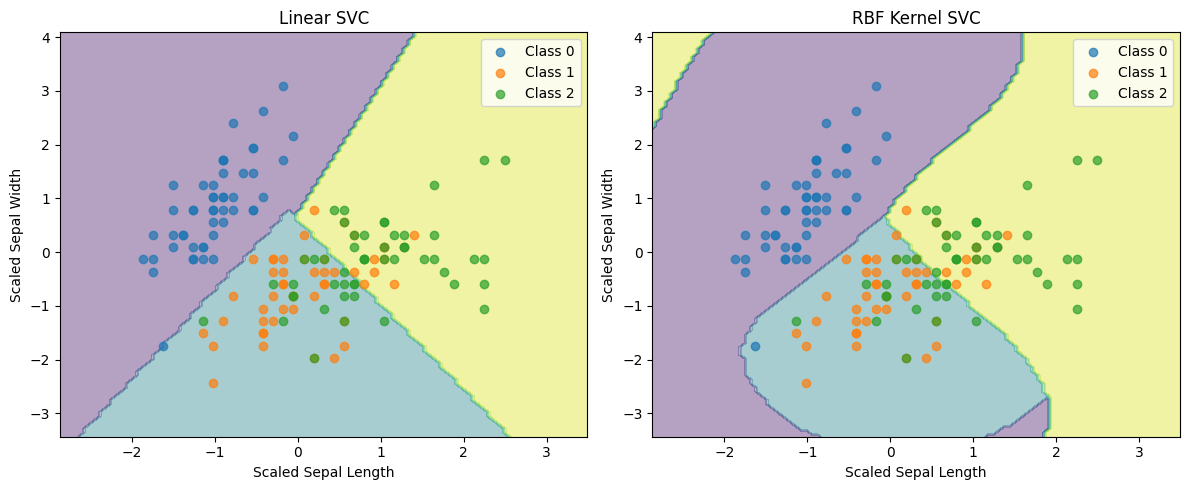

Linear SVC Accuracy:
Training: 0.833
Test: 0.700

RBF Kernel SVC Accuracy:
Training: 0.844
Test: 0.717


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load iris dataset
iris = load_iris()
X = iris.data[:, [0, 1]]  # Using first two features only
y = iris.target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split with test_size=0.4 as specified in the question
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, random_state=0
)

# both linear and RBF kernel
linear_svc = SVC(kernel='linear')
rbf_svc = SVC(kernel='rbf')  # RBF kernel for non-linear separation

# Fit both models
linear_svc.fit(X_train, y_train)
rbf_svc.fit(X_train, y_train)

# Create visualization
plt.figure(figsize=(12, 5))

# Plot both linear and RBF results
for idx, (model, title) in enumerate([
    (linear_svc, 'Linear SVC'),
    (rbf_svc, 'RBF Kernel SVC')
]):
    plt.subplot(1, 2, idx+1)
    
    # Plot the decision boundary
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision regions
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    # Plot training points
    for i in range(3):
        plt.scatter(X_scaled[y == i, 0], X_scaled[y == i, 1], 
                   label=f'Class {i}', alpha=0.7)
    
    plt.xlabel('Scaled Sepal Length')
    plt.ylabel('Scaled Sepal Width')
    plt.title(title)
    plt.legend()

plt.tight_layout()
plt.show()

# Print accuracy scores
print("Linear SVC Accuracy:")
print(f"Training: {linear_svc.score(X_train, y_train):.3f}")
print(f"Test: {linear_svc.score(X_test, y_test):.3f}")
print("\nRBF Kernel SVC Accuracy:")
print(f"Training: {rbf_svc.score(X_train, y_train):.3f}")
print(f"Test: {rbf_svc.score(X_test, y_test):.3f}")

- Using the kernel trick (RBF in this case), transforms the data into a higher-dimensional space where it becomes linearly separable
- Based on the result, the RBF kernel is better for non-linear data (higher accuracy)